In [ ]:
suppressPackageStartupMessages({
    library(testthat)
})


# Introduction

In this tutorial, we introduce two of the fundamental concepts in the field of connectionsm: distributed representations and learning. In the networks we have examined thus far, each unit has represented a different concept. For instance, in the Jets and Sharks example, a unit could represent a name, an age category, a gang etc. This style of coding is called a local representation. The alternative is to have entire patterns of activation represent each concept. For example, Art might be representated by the pattern (100100111) while Ralph is represented by the pattern (110010110). Each component has no meaning on its own, it is the pattern that representes the concept. This style of coding is called a distributed representation. In this chapter, we will discuss some of the advantages and disadvantages of distributed encodings within artificial neural networks.

Another property of the networks we have examined so far is that the weights have been hand crafted to implement the appropriate function. In the Jets and Sharks network, for instance, interpool connections were positive and intrapool connections were negative by design. However, this process is at best tedious and at worst completely impractical for large poorly defined problems. In order for neural networks to be useful it is necessary to devise learning algorithms that select the weights automatically. In this tutorial, we outline the Hebbian learning rule and investigate some of its properties.

# Distributed Representations

Local and distributed coding schemes tend to have complementary strengths and weaknesses. In this section, we will beign by looking at the advantages of local codes and then examine the advantages of distributed codes.

__Network Understanding__: Local codes make a network easier to understand. Because each node corresponds to a single concept one can interpret the activation of each node as a "degree of belief" in that concept or microhypothesis. In contrast, distributed codes are typcially more difficult to understand and often require the application of additional techniques to help with the reading off process.

__Variable Binding__: A common requirement of many cognitive processes is the ability to bind a variable to a value. In mental arithmetic, we might be told that x=3 and then later be asked the value of x*2. Clearly, to complete this task successfully one must retreive the fact that x was bound to 3. The same sort of operation is a ubiquitius requirement of language processing. When we comprehend the sentence "John loves Mary" we must bind John to the role of lover and Mary to the role of lovee.

Local codes provide a straightforward mechnaism for variable binding. One simply creates a connection between a node representing the variable and the node representing the value. When one wishes to access the value of the variable one locates the variable and follows the connection to the value. Distributed codes make variable binding somewhat more difficult. Because both the variable and the value are patterns over the entire set of nodes the patterns must be chosen carefully in order for them to be able to be simultaneously active without interfering with each other. Furthermore, it is not as obvious how one can create connections that will allow one pattern of activity to be retrieved when another pattern of activity becomes active. The exercises within this tutorial will describe some possible mechanisms.

__Representing Constitutent Structure__: A corollary to the previous observations about the representation of variable bindings is that local codes provide a more straightforward mechanism for representing constituent structure. For instance, for a system to represent the fact that a leg is a part of a body then the concept body must be bound to the leg with a "part-of" connection. While this is easy with a local scheme is requires a more sophisticated mechanism when dealing with distributed representations.

__Similarity and Generalization__: While local codes have a number of advanatges in the representation of structured data, distributed codes have several properties that are suggestive of human cognitive function. In particular, distributed codes for different concepts can be more or less similar to each other. As a consequence, distributed codes support automatic generalization. Suppose, for instnace, we employ distributed codes to represent animals. We might expect that chimpanzees and apes would correspond to similar patterns, while the pattern representing mice might be somewhat different and that representing rocks would be in a different part of space entirely (example from Hinton, McCelland & Rumelhart 1986). Now suppose we learn a new piece of information about chimpanzees, perhaps that they like onions. By virtue of the similarity of the distributed patterns representing apes and chimpanzees the act of learning information about the chimpanzees will also code that information for apes. That is, because chimpanzees are similar to apes the system will asume that apes also like onions. Now, later information may overide this new learning indicating that in fact apes do not like onions, but in the first instance the system will assume that the inference is sound. In a system employing local codes, however, this inference would not be a natural consequence of the representational scheme. Some subsystem would have to independently establish a connection between apes and onions.

__Type/Instance Hierarchies__: A related point is that distributed representations are useful for storing Type/Instance hierarchies. If we suppose that the part of the ape and chimpanzee patterns that overlaps corresponds to type information (all these things are monkeys) then the part of the pattern that differentiates apes and chimpanzees is the instance information. That is, the one distributed pattern contains both the type and the instance. Now when we learn something about an instance we are also learning about the type and vice versa, if we learn something about a type we are learning about the instances within that type automatically.

__Creation of New Concepts__: The final advantage of distributed representations relates to the formation of new concepts. Within a local coding scheme the formation of a new concept implies the creation of a new unit, that is, the creation of an entirely new piece of hardware. At least on the face of it, this does not seem to be the way that the neurophysiology works. A more subtle, but perhaps more profound point is that the necessity to create new units, means that one must identify when one is dealing with a new concept and when one is dealing with a variation of an already existing concept. In a distributed scheme patterns can be more of less similar, and there is no need to define where one concept stops and the next begins.

In the exercises in the remainder of the tutorial, you will be working with distributed patterns and exploring some of their properties. Firstly, however, we need to introduce the concept of learning.

# Hebbian Learning

The simplest form of weight selection mechanism is known as Hebbian learning. This form of learning is a mathematical abstraction of the principle of synaptic modulation first articulated by Hebb (1949). Hebb's law says that if one neuron stimulates another neuron when the receiving neuron is firing, the strength of the connection between the two cells is strengthened. 

Mathematically this is expressed as:

$$
\Delta w_{ij} = a_i a_j
$$

That is, the change in a weight is equal to the product of the activations of the units which it connects. So if both units are on ($a_i = a_j = 1$) or both units are off ($a_i = a_j = -1$) the strength of the weight is increased, otherwise it is decreased. Note that the mathematical expression goes beyond Hebb's Law in that it allows for a weight to increase if both units are off and to decrease if the activations of its units are 1 and -1. These properties are probably not physiologically justified and can be modified, however the system is easiest to understand if the simple Hebbian rule is applied.

In this exposition, we described the learning rule in terms of the interactions of individual units. More generally, however, Hebbian learning is equivalent to vector, matrix and tensor algebra. Thinking of learning in these terms allows us to take advantage of a long mathematical tradition and to use what has been learned. For that reason, we will now do a quick refresher course on vector, matrix and tensor algebra and describe how these algebraic systems correspond to neural network architectures.

# Tensors Explained

Tensors are convenient ways of collecting together numbers. For instance, a vector, which is also known as a rank one tensor, could be used to describe the age, gender, and salary of an employee. If Jeff is 50 years old, is male (where male = 0 and female = 1) and earns \\$56000 per annum then we could describe Jeff with the vector [50, 1, 56000] (see Figure 1). Note that vectors (and tensors in general) are ordered. The vector [56000, 1, 50] would describe someone who was 56000 years old who made a total of \\$50 per annum!


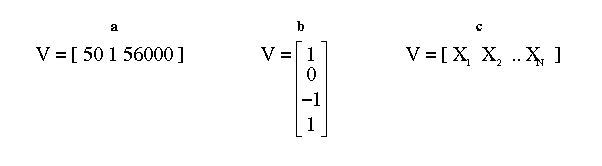


Figure 1: Examples of vectors. (a) a row vector describing Jeff, (b) a column vector, (c) a vector with N components.

The rank one tensor described above has a dimension of three because it contains three components. There is no reason that vectors need be restricted to three dimensions, however. We could have added shoe size, for instance, to increase the dimension to four. Similarly, there is no reason that we need to restrict ourselves to a single row of numbers. A tensor with N rows and M columns is known as an NxM matrix and has a rank of two, indicating that the array of numbers extends in two directions (see Figure 2).

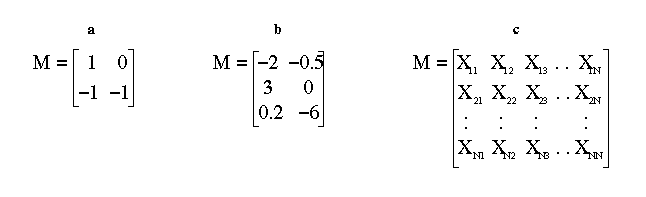

Figure 2: Examples of matrices. (a) a 2x2 matrix, (b) a 3x2 matrix, (c) an NxN matrix.

The process of extending the number of directions in which the array extends can theoretically continue indefinitely, creating tensors of rank three, four, five etc. In the following sections, we will look at vectors, matrices and tensors of rank three (see Figure 3) as they are critical to understanding how associations of distributed represenations can be stored. Models, such as the STAR model of analogical reasoning (Halford, Wiles, Humphreys and Wilson 1992), employ tensors of higher rank.

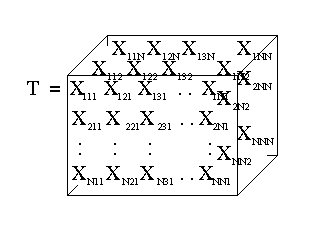

Figure 3: A rank three tensor (NxNxN).


## Vectors - Rank One Tensors

Tensors, and in particular vectors, can be represented in many different forms including:

__Cartesian__ form in which the components are enumerated explicitly. Figure 1 depicts vectors represented in Cartesian form.

__Geometric__ form in which the vector is plotted in N dimensional space. For instance, Figure 4 shows the vector representing Jeff plotted in three dimensional space.

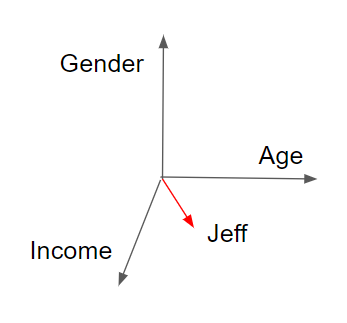

Figure 4: The vector representing Jeff plotted in three dimensional space (Geometric form).

__Algebraic__ form in which a vector is represented as a bolded lower case letter (e.g. __v__). Algebraic form is a particularly concise form of representation, which makes it easy to talk about the operations that can be performed on vectors such as addition (e.g. __w__ = __v__ + __t__).

__Neural network__ form which diagrams a neural network architecture in which either a set of units or a set of weights contain the elements of the vector. For instance, a vector can be mapped to a two layer network (one input and one output layer) as depicted in Figure 5. The number of units in the input layer corresponds to the number of dimensions in the original vector, while the output layer contains only 1 unit. Each input unit is connected to each output unit. The input units represent one vector and the weights represent a second vector.

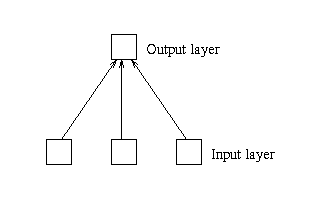

Figure 5: The network corresponding to a vector memory.

The output of this network is defined to be the dot product (or inner product) of the input and weight vectors. A Dot Product is calculated by multiplying together the values which are in the same position within the two vectors, and then adding the results of these multiplications together to get a scalar (see Figure 6a). In the case of the neural network, this involves multiplying each input unit activation by the corresponding weight value and then adding. The dot product of two vectors represents the level of similarity between them and can be extended to higher rank tensors (see Figure 6b)

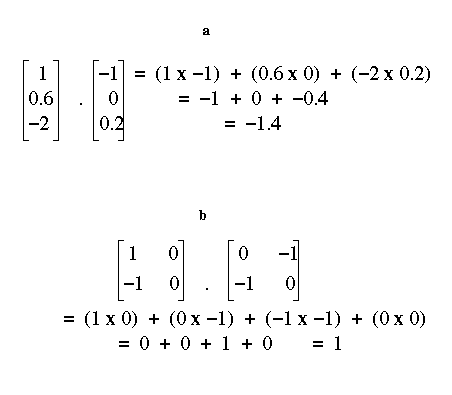

Figure 6: The Dot Product.

The dot product is expressed algebraically as a dot, that is, the dot product of the vectors __v__ and __w__ is written __v__.__w__. If the dot product of two vectors is zero (__v__.__w__ = 0) then the vectors are __orthogonal__. If the dot product of a vector and itself is 1 then the vector is __normal__. More generally, the dot product of a vector and itself is the length of the vector squared:

$$
x.x = |x|^2
$$

Learning occurs in the network above by adding the input vectors. Vector addition superimposes vectors of the same dimension. It is calculated by adding together the elements in a particular position in each vector (see Figure 7a). In this way, multiple memories can be stored within the same vector.

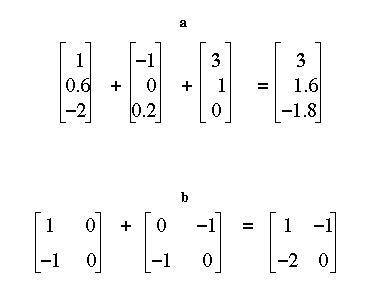

Figure 7: (a) Vector Addition, (b) Matrix Addition.

Again vector addition can be extended to tensors of arbitrary rank (see Figure 7b). Vector addition is expressed algebraically as a plus sign (+). So if we wanted to talk about the dot product of __v__ with the addition of __w__ and __x__ we would write __v__.(__w__ + __x__). Another useful property to keep in mind is that the dot product distributes over addition. That is:

__v__.(__w__ + __x__) = __v__.__w__ + __v__.__x__

Suppose we have three items represented by the vectors __v__, __w__, and __x__. We can form a memory by adding these:

__m__ = __v__ + __w__ + __x__ 

To determine if a given item has been stored we calculate the dot product of the item with the memory vector. 

__w__.__m__ = __w__.(__v__ + __w__ + __x__)

= __w__.__v__ + __w__.__w__ + __w__.__x__

= 1

Alternately, if w was not stored the dot product would be 0.

In the following exercises, you will build a vector memory that learns to discriminate between stored items and new items. Firstly, however, we define a function called arrow to draw vectors so we can visualise the operations we are implementing. 

In [ ]:
# draw an arrow from the origin to a point

arrow = function(pt, name = ""){
    mx = 2
    my = 2
    plot(c(0, pt[1]), c(0, pt[2]), type="l", xlim=c(-mx,mx), ylim=c(-my,my), xlab="", ylab="")
    lines(c(0, 0), c(-my, my))
    lines(c(-mx, mx), c(0,0))
    arrows(0, 0, pt[1], pt[2])
    title(name)
}

Now we will define the three vectors that will repesent the three items that we will use to demonstrate our memory model - FROG, TOAD and KOALA.

In [ ]:
# vectors for three animals

FROG = c(0.95, 0.32)
TOAD = c(0.49, 0.87)
KOALA = c(0.32, -0.95)
arrow(FROG, "FROG")
arrow(TOAD, "TOAD")
arrow(KOALA, "KOALA")

Note that the FROG and TOAD vectors are quite similar to each other while the KOALA vector is very different.


## Exercise 1 (1 point)

Write expressions to calculate the length of the FROG, TOAD and KOALA vectors (hint: You can calculate the dot product of two vectors using the %*% operator). Assign your answers to variables of the form length<name>. That is, your code should look like:
    
lengthFROG = <fill in here>
    
lengthTOAD = <fill in here>
    
lengthKOALA = <fill in here>

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

## Exercise 2 (1 point)

You should find that the lengths are all close to 1. What are vectors with length 1 called?


YOUR ANSWER HERE

## Exercise 3 (1 point)

Create three memory vectors. m1 should contain just FROG. m2 should contain FROG and KOALA and m3 should contain FROG and TOAD. Then draw each of these memory vectors.

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

## Exercise 4 (2 point)

Test each of the items, FROG, TOAD and KOALA, against each of the memories (m1, m2 and m3). Place the results in variables that start with the cue name then have an underscore and then have the memory name. For instance, place the result of presenting the FROG cue to m1 in FROG_m1. So your code should look like this:

FROG_m1 = <fill this in>
    
TOAD_m1 = <fill this in>
    
KOALA_m1 = <fill this in>

FROG_m2 = <fill this in>
    
TOAD_m2 = <fill this in>
    
KOALA_m2 = <fill this in>

FROG_m3 = <fill this in>
    
TOAD_m3 = <fill this in>
    
KOALA_m3 = <fill this in>


In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

Explain the match values. 



YOUR ANSWER HERE

## Exercise 5 (1 point)

If you saw the FROG pattern twice (and nothing else), how would the matches with FROG, TOAD and KOALA change? Write the algebraic equations to illustrate why.


YOUR ANSWER HERE

# Matrices - Rank Two Tensors

The vector memory, discussed above, was capable of storing items so that at a later time it could be determined if they had appeared. A matrix memory allows two items to be associated - so that given one we can retrieve the other. Algebraically, a matrix is usually represented as a bolded upper case letter (e.g. __M__).

Associations are formed using the outer product operation. An __outer product__ between two vectors is calculated by multiplying each element in one vector by each element in the other vector (see Figure 8). If the first vector has dimension $d_1$ and the second vector dimension $d_2$, the outer product matrix has dimension $d_1$x$d_2$. For instance, a three dimensional vector multiplied by a two dimensional vector has dimension 3x2.

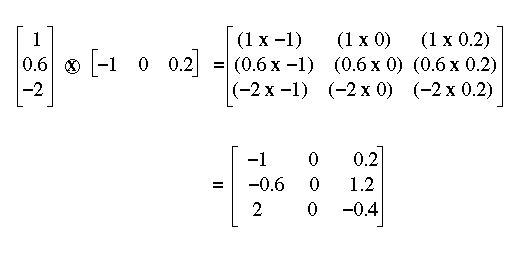

Figure 8: The outer product.

The outer product operation is expressed algebraically by placing the vectors to be multiplied next to each other. So the outer product of __v__ and __w__ is written as __v__ __w__.

These association matrices are then added into the memory matrix (as in the vector memory case) - so that all associations are stored as a single composite. Suppose we have three people represented by the vectors __a__ (Art), __r__ (Rick), and __s__ (Sam) and two gangs represented by __j__ (Jets) and __s__ (Sharks). Suppose that Art and Sam belong to the Jets and Rick to the Sharks. We can form a memory of these associations by finding outer products and adding:

__M__ = __aj__ + __rs__ + __sj__

To retrieve the gang of Rick we calculate the dot product of the item vector (__r__) with the memory matrix.

__r__.__M__ = __r__.(__aj__ + __rs__ + __sj__)

= (__r__.__a__)__j__ + (__r__.__r__)__s__ + (__r__.__s__) __j__

= __s__

provided the vectors are normal and orthogonal to one another.

A matrix memory maps to a two layer network (one input and one output layer) as depicted in Figure 9. The number of input units corresponds to the number of rows in the original matrix, while the number of output units corresponds to the number of columns. Each input unit is connected to each output unit.

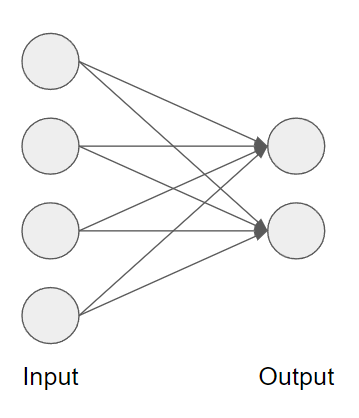

Figure 9: The network representation of a matrix.

In the following exercise, you will use a matrix memory network to store and recall pairs of items.

We are going to create a memory system that associates animals with the things they eat. We start by defining the vectors for each animal and each food.

In [ ]:
# Cues

FROG = c(0.5, -0.5, 0.5, -0.5)
KOALA = c(0.5, 0.5, -0.5, -0.5)
SNAIL = c(-0.5, 0.5, 0.5, -0.5)
TOAD = c(0.6, -0.1, 0.8, -0.1)

# Targets

FLIES = c(0.7, 0.5, 0.5)
LEAVES = c(0.7, -0.5, -0.5)
LETTUCE = c(0, -0.7, 0.7)


## Exercise 6 (1 point)

Now define a memory __M__ that contains the associations between FROG and FLIES, KOALA and LEAVES and SNAIL and TOAD (hint: you can use the %o% operator to form the outer product of two vectors).

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

## Exercise 7 (1 point)

Test each of the items FROG, KOALA, SNAIL and TOAD. Place the results in the variables FROG_M, TOAD_M, KOALA_M and SNAIL_M.

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

What output is produced in each case? (Give the output pattern and also describe the output patterns in terms of their similarity to FLIES, LEAVES and LETTUCE).

YOUR ANSWER HERE

## Exercise 8 (1 point)

Calculate the similarities (dot products) of each of the cues with itself and with the other cues and assign them to variables indicating each of the patterns separated by an _. Your code should look as follows:

FROG_FROG = your answer here

KOALA_FROG = your answer here

SNAIL_FROG = your answer here

TOAD_FROG = your answer here

FROG_KOALA = your answer here

KOALA_KOALA = your answer here

SNAIL_KOALA = your answer here

TOAD_KOALA = your answer here

FROG_SNAIL = your answer here

KOALA_SNAIL = your answer here

SNAIL_SNAIL = your answer here

TOAD_SNAIL = your answer here

FROG_TOAD = your answer here

KOALA_TOAD = your answer here

SNAIL_TOAD = your answer here

TOAD_TOAD = your answer here

Create a table as follows so you can see the pattern of similarities:

| | FROG | KOALA | SNAIL | TOAD |
| :- | :- | :- | :- | :- |
| FROG |  |  |  |  |
| KOALA |  |  |  |  |
| SNAIL |  |  |  |  |
| TOAD |  | |  |  |


In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

## Exercise 9 (1 point)

Use the similarity measures from the table above to show the weighted sum for each of the retrievals (you should have an equation for each cue - that is, one for FROG, KOALA, SNAIL and TOAD each expressed as a weighted sum of FLIES, LEAVES and LETTUCE).


YOUR ANSWER HERE